# A few tips to get started with the midterm

In [100]:
import numpy as np
import matplotlib.pyplot as plt

### Autoregressive process

In [110]:
# number of point
N = 10000
# generate random numbers with normal dist. (Gaussian white noise)
x = np.random.randn(N)
# build red noise (here the time series will have a "memory")
auto = np.empty_like(x)
auto[0] = x[0]
for i in range(1,N):
    auto[i] = 0.5*auto[i-1] + x[i] 

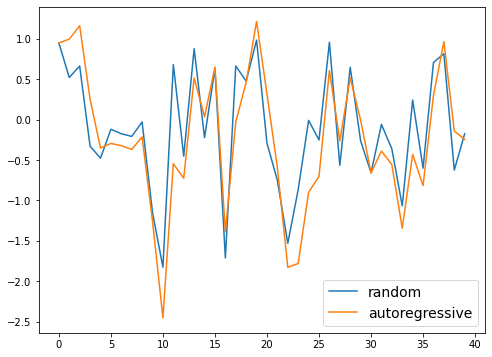

In [111]:
plt.figure(figsize=(8,6))
plt.plot(x[:40], label='random')
plt.plot(auto[:40], label='autoregressive')
plt.legend(fontsize=14)

### Segments with overlap

Here I will show a hard coded, brute-force way of doing segments with 50% overlap. Let's first start with a very simple case, where we have 20 data points and want to have 3 segments of 10 points (with 50% overlap)

In [114]:
# length of the data
N = 20 
# number of segments
M = 2 
# segment length
p = N//M 
# fake data of size N
x = np.random.randn(N) 
# reshape data into M segments of length p (no overlaping)
segments = x.reshape(M,p) 
print(segments.shape)

(2, 10)


Now, we want to have an additional segment that overlapps with the second half of the first segment and the first half of the second segment:

`overlap = x[p//2:-p//2]`

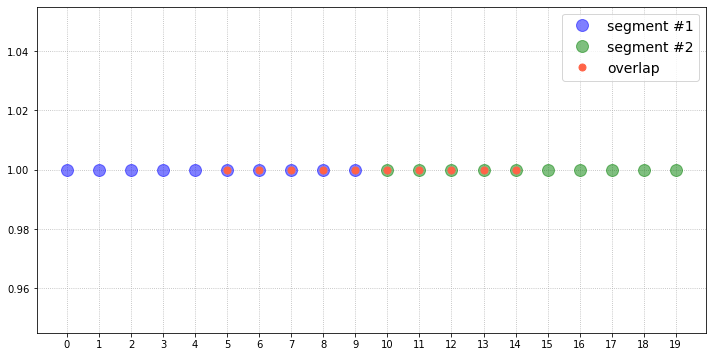

In [145]:
h = np.ones(N)
points = np.arange(N)
middle_points = points[p//2:-p//2]

plt.figure(figsize=(12, 6))
plt.plot(points[:p], h[:p], 'ob', markersize=12, alpha=0.5, label='segment #1')
plt.plot(points[p:], h[p:], 'og', markersize=12, alpha=0.5, label='segment #2')
plt.plot(middle_points, h[p//2:-p//2], 'o', color='tomato', markersize=7, label='overlap')
plt.xticks(points)
plt.legend(fontsize=14)
plt.grid(ls='dotted')

Ok. So now, if we want to do this for many segments, we could try:

In [148]:
# length of the data
N = 100 
# number of segments
M = 5 
# segment length
p = N//M 
# fake data of size N
x = np.random.randn(N)
segments = x.reshape(M,p)
segments.shape

(5, 20)

Now, we create the additional segments with 50% overlappin. In this case, we will get $4 = M-1$ additional segments.

In [153]:
overlap = x[p//2:-p//2].reshape(M-1,p)
overlap.shape

(4, 20)

Now, let's check if this makes sense

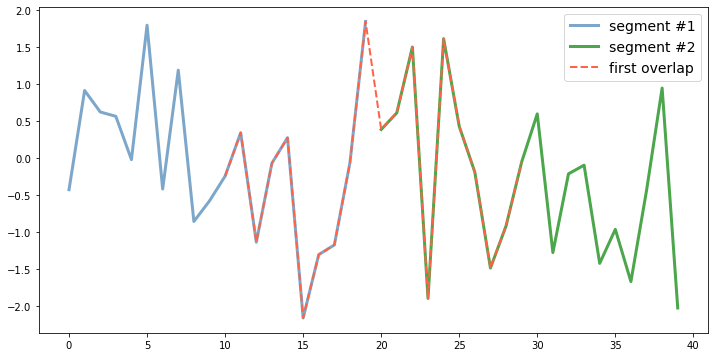

In [167]:
t = np.arange(N)

plt.figure(figsize=(12, 6))
plt.plot(t[:p], segments[0], lw=3, color='steelblue', alpha=0.7, label='segment #1') # first segment
plt.plot(t[p:2*p], segments[1], lw=3, color='g', alpha=0.7, label='segment #2') # second segment
plt.plot(t[p//2:p+p//2], overlap[0], '--', color='tomato', lw=2, label='first overlap') # first overlapping segment
plt.legend(fontsize=14)

Now, we can just stack the non-overlapping and overlapping segments together.

In [168]:
all_segments = np.vstack([segments, overlap])
all_segments.shape 

(9, 20)

Now, we can try to make this a bit more flexible and reusable.

!!!!!!!! Use the function below as a guide, but don't blindly trust it. Test it with fake data or anything that you know what the answer should be!!!!!!!!!

In [229]:
def overlapping_segments(x, segment_length, overlap=0.0):
    """Divides array into overlapping segments
    Parameters
    ----------
    x : 
        input 1D array
    segment_length :
        length of each segment
    overlap : float, optional
        fraction of overlapping between segments. The default overlap is zero.
    Returns
    -------
    segments :
        ndarray with number of segments as the first dimension and segment length in the
        second dimension.
    Notes
    -----
    For this function to work segment_length times overlap has to be an integer. 
    The length of the input array len(x) divided by segment_length also has to be an integer.
    """
    
    assert isinstance(x, np.ndarray), "x must be a Numpy array"
    assert x.ndim == 1, "x must be a 1D Numpy array"
    
    N = len(x) 
    assert (N/segment_length).is_integer(), "The number of segments must be an integer"
    assert (overlap*segment_length).is_integer(), "The number of points to overlap must be an integer"
    
    n_seg = N//segment_length    
    left = range(0, N-segment_length+1, round((1-overlap)*segment_length))
    segments = []
    for l in left:
        r = l + segment_length
        segments.append(x[l:r])
    segments = np.array(segments)
    return segments